In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import webbrowser
from PIL import Image
from io import BytesIO

np.random.seed(42)
%matplotlib inline

# Note:
some changes were made to make the visual assessment user friendly when viewing this on GitHub so the pages won't collapse.

Changes consist viewing only 10 rows or less for any dataframe. Some were commented so it would not annoy the viewers.

In [2]:
#to fully view the dataframe 
pd.options.display.max_columns=35
print("max rows:",pd.get_option("display.max_rows"))
print("max columns:",pd.get_option("display.max_columns"))

max rows: 60
max columns: 35


In [3]:
def get_data(url,name):
    ''''
    a function that accepts url and name for data to be downloaded 
    '''
    response=requests.get(url)
    with open(name,mode="wb") as file:
        file.write(response.content)

# Gathering data
> In this part of the process we will gather the data using requests library and download it to a Data frame that we can assess at the next step.

In [4]:
#downloading getting data to the repository as csv/tsv

twitter_url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv"
image_url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
get_data(twitter_url,"twitter-archive.csv")
get_data(image_url,"image-predictions.tsv")

In [5]:
# reading our data to a DataFrame
twitter_archive=pd.read_csv("twitter-archive.csv")
image_prediction=pd.read_csv("image-predictions.tsv",sep="\t")

In [6]:
# read json file which was provided by udacity
json_tweet=pd.read_json("tweet-json.txt",lines=True)

# Assessing data
> we will inspect our dataset for two things: data quality issues (i.e. content issues) and lack of tidiness (i.e. structural issues) and assessing the data visually and programmatically to identify:
- Data quality issues
- Tidiness issues
# Requirements:
>requirementsof this project are <b>only</b> to assess and clean at least <b>8</b> quality issues and at least <b>2</b> tidiness issues in this dataset.

In [7]:
#sort by Id and get the first five rows
twitter_archive.sort_values(by="tweet_id").head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


In [8]:
twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [9]:
# return a random sample of items
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
672,789903600034189313,NaN,NaN,2016-10-22 18:57:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ralphy. His dreams were just shattered...,NaN,NaN,NaN,https://vine.co/v/5wPT1aBxPQZ,13,10,Ralphy,None,None,pupper,None
1185,718613305783398402,NaN,NaN,2016-04-09 01:35:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Carper. He's a Tortellini Angiosperm. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718613305...,11,10,Carper,None,None,None,None
1652,683481228088049664,NaN,NaN,2016-01-03 02:53:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Banjo. He's a Peppercorn Shoop Da Whoop. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683481228...,11,10,Banjo,None,None,pupper,None
611,797165961484890113,7.971238e+17,29166305.0,2016-11-11 19:55:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@JODYHiGHROLLER it may be an 11/10 but what do...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,180670967.0,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [10]:
# we will check the Validation of name,rating numerator and  denominator and  using the the below txt
twitter_archive.text[1]

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"

**Most of the text have a pattern for name "this is {name} .... 10/10. we can extract names and ratings from here if needed.**

In [11]:
twitter_archive.rating_numerator[1]

13

In [12]:
twitter_archive.rating_denominator[1]

10

In [13]:
twitter_archive.in_reply_to_status_id.value_counts()

6.671522e+17    2
8.562860e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
               ..
8.482121e+17    1
6.715449e+17    1
6.936422e+17    1
6.849598e+17    1
7.331095e+17    1
Name: in_reply_to_status_id, Length: 77, dtype: int64

In [14]:
# twitter_archive.in_reply_to_user_id.value_counts()

In [15]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

## Observation: 
lots of missing data in column (1,2,6,7,8) we probably don't need them due to missing data and avoiding inaccuracy.

In [16]:
test=twitter_archive[["text",'name', 'doggo', 'floofer', 'pupper', 'puppo']]

In [17]:
# checking if there is two not NaN in one row 
#in order to organize them to one column
test[test!='None'].iloc[900:930]

,text,name,doggo,floofer,pupper,puppo
900,Meet Boston. He's worried because his tongue w...,Boston,NaN,NaN,NaN,NaN
901,This is Brandonald. He accidentally opened the...,Brandonald,NaN,NaN,NaN,NaN
902,Why does this never happen at my front door......,NaN,NaN,NaN,NaN,NaN
903,This is Odie. He falls asleep wherever he want...,Odie,NaN,NaN,NaN,NaN
904,This is Corey. He's a Portobello Corgicool. Tr...,Corey,NaN,NaN,NaN,NaN
905,In case you haven't seen the most dramatic sne...,NaN,NaN,NaN,NaN,NaN
906,Teagan reads entire books in store so they're ...,NaN,NaN,NaN,NaN,NaN
907,This is Leonard. He hides in bushes to escape ...,Leonard,NaN,NaN,NaN,NaN
908,RT @dog_rates: This is Chompsky. He lives up t...,Chompsky,NaN,NaN,NaN,NaN
909,This is Beckham. He fell asleep at the wheel. ...,Beckham,NaN,NaN,NaN,NaN


In [18]:
# wronge name
test.iloc[924]

text       This is one of the most inspirational stories ...
name                                                     one
doggo                                                  doggo
floofer                                                 None
pupper                                                  None
puppo                                                   None
Name: 924, dtype: object

In [19]:
twitter_archive.text.iloc[924]

"This is one of the most inspirational stories I've ever come across. I have no words. 14/10 for both doggo and owner https://t.co/I5ld3eKD5k"

In [20]:
test.iloc[917]

text       This is Jax. He is a majestic mountain pupper....
name                                                     Jax
doggo                                                   None
floofer                                                 None
pupper                                                pupper
puppo                                                   None
Name: 917, dtype: object

In [21]:
# visual assessment 
twitter_archive.name.unique()[:10]

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda'], dtype=object)

In [22]:
twitter_archive.nunique()[:10]

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
dtype: int64

In [23]:
twitter_archive[twitter_archive.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [24]:
twitter_archive.doggo.unique()

array(['None', 'doggo'], dtype=object)

In [25]:
for i,v in enumerate(twitter_archive.columns[-4:]):
    print(i,":",v,twitter_archive[v].unique())

0 : doggo ['None' 'doggo']
1 : floofer ['None' 'floofer']
2 : pupper ['None' 'pupper']
3 : puppo ['None' 'puppo']


In [26]:
#better to replace them with what's between the tag
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [27]:
twitter_archive.expanded_urls.value_counts()[20:30]

https://twitter.com/dog_rates/status/786963064373534720/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/669000397445533696/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/676936541936185344/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/694669722378485760/photo/1,https://twitter.com/dog_rates/status/694669722378485760/photo/1                                                                                          

In [28]:
twitter_archive[['expanded_urls']].head()

,expanded_urls
0,https://twitter.com/dog_rates/status/892420643...
1,https://twitter.com/dog_rates/status/892177421...
2,https://twitter.com/dog_rates/status/891815181...
3,https://twitter.com/dog_rates/status/891689557...
4,https://twitter.com/dog_rates/status/891327558...


## visual assessment:
visual assessment of 'expanded_urls' column highlighted in yellow. Duplicated cell values separated with comma multiple variabels are stored in one column 'tidiness issue'.

In [29]:
#twitter_archive.style.set_properties(subset=['expanded_urls'], **{'width-min': '300px','background-color': 'lightyellow'})
#user friendly 

In [30]:
# we will check now rating numerator and denominator
twitter_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [31]:
twitter_archive[twitter_archive.rating_denominator==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [32]:
# not correct ratings in rating columns, verivyed below
twitter_archive.text.iloc[313]

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [33]:
# this is to view and varify the ratings but also cleaning.
#it will be applied in cleaning part
import re
pat=re.compile(r"(\d+\/\d+)")
text_pat=twitter_archive["text"].str.findall(pat)
# text_pat=text_pat.apply(lambda x:x[-1])
text_pat.iloc[300:315]

300            [12/10]
301            [11/10]
302            [11/10]
303            [13/10]
304            [12/10]
305            [13/10]
306            [13/10]
307            [12/10]
308            [11/10]
309            [12/10]
310            [13/10]
311            [12/10]
312            [12/10]
313    [960/00, 13/10]
314            [12/10]
Name: text, dtype: object

In [34]:
# how many fraction ratings we have 
(twitter_archive["text"].str.contains(r"(\d+\.\d*\/\d+)")).sum()

/Users/abdullahabu-sabba/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


6

In [35]:
print(pd.options.display.max_colwidth)
pd.options.display.max_colwidth=200

50


In [36]:
# extracting string with fraction in text
twitter_archive[twitter_archive["text"].str.contains(r"(\d+\.\d*\/\d+)")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None


In [37]:
twitter_archive[["rating_numerator","rating_denominator"]].iloc[300:315]

,rating_numerator,rating_denominator
300,12,10
301,11,10
302,11,10
303,13,10
304,12,10
305,13,10
306,13,10
307,12,10
308,11,10
309,12,10


In [38]:
twitter_archive.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [39]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [40]:
#view rows where rating numerator equals 14
twitter_archive.query("rating_numerator==14").head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo,None,None,None
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/885517367337512960,14,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805382717440/photo/1,14,10,None,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None


In [41]:
twitter_archive[twitter_archive.rating_numerator==666].text

189    @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
Name: text, dtype: object

In [42]:
#view rows where rating numerator equals 88
(twitter_archive.query("rating_numerator==88")
 [["text","rating_numerator","rating_denominator","name"]].head()
 )

,text,rating_numerator,rating_denominator,name
1843,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,88,80,None


In [43]:
twitter_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [44]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [45]:
#view rows where rating numerator equals 0
(twitter_archive.query("rating_denominator==0")
 [["text","rating_numerator","rating_denominator"]].head()
 )

,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0


In [46]:
twitter_archive.text.iloc[10:]
# we should remove RT and @

10      This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme
11                             This is Bruno. He is a service shark. Only gets out of the water to assist you. 13/10 terrifyingly good boy https://t.co/u1XPQMl29g
12                              Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm
13                                             This is Ted. He does his best. Sometimes that's not enough. But it's ok. 12/10 would assist https://t.co/f8dEDcrKSR
14                  This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq
                                                                                   ...                                                                            
2351                  

In [47]:
# these are the values that starts with RT 'retweet'
retweet=twitter_archive[twitter_archive.text.str.startswith("RT")]
retweet

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,http...",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,http...",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @twitter: @dog_rates Awesome Tweet! 12/10. Would Retweet. #LoveTwitter https://t.co/j6FQGhxYuN,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,"https://twitter.com/twitter/status/711998279773347841/photo/1,https://twitter.com/twitter/status/711998279773347841/photo/1",12,10,None,None,None,None,None
1286,708400866336894977,NaN,NaN,2016-03-11 21:15:02 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",RT if you are as ready for summer as this pup is 12/10 https://t.co/xdNNEZdGJY,NaN,NaN,NaN,https://vine.co/v/iHFqnjKVbIQ,12,10,None,None,None,None,None
1860,675489971617296384,NaN,NaN,2015-12-12 01:38:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT until we find this dog. Clearly a cool dog (front leg relaxed out window). Looks to be a superb driver. 10/10 https://t.co/MnTrKaQ8Wn,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675489971617296384/photo/1,10,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http

In [48]:
twitter_archive.iloc[2335]

tweet_id                                                                                                                                            666287406224695296
in_reply_to_status_id                                                                                                                                              NaN
in_reply_to_user_id                                                                                                                                                NaN
timestamp                                                                                                                                    2015-11-16 16:11:11 +0000
source                                                                              <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
text                          This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwL

# Assesing image prediction data
- tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921
- p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever
- p1_conf is how confident the algorithm is in its #1 prediction → 95%
- p1_dog is whether or not the #1 prediction is a breed of dog → TRUE
- p2 is the algorithm's second most likely prediction → Labrador retriever
- p2_conf is how confident the algorithm is in its #2 prediction → 1%
- p2_dog is whether or not the #2 prediction is a breed of dog → TRUE etc.

In [49]:
image_prediction.sort_values(by="tweet_id").head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [50]:
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
274,670833812859932673,https://pbs.twimg.com/media/CU9HyzSWIAAVcte.jpg,1,Pekinese,0.609853,True,Persian_cat,0.265442,False,Japanese_spaniel,0.027460,True
1733,821407182352777218,https://pbs.twimg.com/ext_tw_video_thumb/821407155391725568/pu/img/AJC07gFJDDBuwNTD.jpg,1,Irish_setter,0.505496,True,vizsla,0.168747,True,Chesapeake_Bay_retriever,0.111311,True
71,667200525029539841,https://pbs.twimg.com/media/CUJfVMPXIAAgbue.jpg,1,Siberian_husky,0.694904,True,malamute,0.232006,True,Eskimo_dog,0.050635,True
1027,710844581445812225,https://pbs.twimg.com/media/Cd1tYGmXIAAoW5b.jpg,1,dingo,0.536593,False,Pembroke,0.200407,True,basenji,0.060734,True
1589,798628517273620480,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
296,671362598324076544,https://pbs.twimg.com/media/CVEouDRXAAEe8mt.jpg,1,tub,0.393616,False,bathtub,0.383522,False,swimming_trunks,0.077301,False
692,684222868335505415,https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,1,soft-coated_wheaten_terrier,0.791182,True,cocker_spaniel,0.072444,True,teddy,0.071486,False
872,697990423684476929,https://pbs.twimg.com/media/Ca_ClYOW0AAsvpE.jpg,2,Pembroke,0.984783,True,Cardigan,0.015018,True,Shetland_sheepdog,0.000074,True
171,668994913074286592,https://pbs.twimg.com/media/CUi_UtnWIAEtfqz.jpg,1,hog,0.113789,False,English_springer,0.089763,True,French_bulldog,0.082186,True
1369,761976711479193600,https://pbs.twimg.com/media/CpMVxoRXgAAh350.jpg,3,Labrador_retriever,0.475552,True,Chesapeake_Bay_retriever,0.082898,True,Staffordshire_bullterrier,0.048464,True


In [51]:
image_prediction[image_prediction.tweet_id==888202515573088257]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.05495,True,beagle,0.038915,True


In [52]:
twitter_archive[twitter_archive.tweet_id==888202515573088257]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,http...",13,10,Canela,None,None,None,None


## observation:
I've noticed that the jpg_url in the image_prediction refers to the first picture In the tweet only however, omg_num indicates 2 picture and we can verify by twitter_archive column expand_url as it shows the whole twitter page.

In [53]:
# test if i can pull the img tag and src attributes 
# this url from expanded_urls columns in twitter_archive DataFrame 
#url="https://twitter.com/dog_rates/status/887473957103951883/photo/1"
# r=requests.get(url) # this will return a response object
# html=r.text # return html text 
# soup=BeautifulSoup(html,"lxml")
# soup.find("img")

I wanted to get the images url by getting the src attribute from expanded_urls where img_num larger than 1 but according to Twitter terms of service https://twitter.com/en/tos I'm not allowed unlise I use their API which I wasn't granted. so I will consider expanded url as my images column

In [54]:
# at first glance I noticed a tidiness issue. not each column represents a variable
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [55]:
# checking if tweet_id in our dataframes are the same
len([x for x in image_prediction.tweet_id.tolist()\
     if x in twitter_archive.tweet_id.tolist() and \
    x in json_tweet.id.tolist()])

2073

In [56]:
# no duplicated 
image_prediction[image_prediction.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [57]:
image_prediction[image_prediction["jpg_url"]!=None].head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [58]:
for index,name in enumerate(image_prediction.columns):
    print(name,":",image_prediction[name].duplicated().sum())

tweet_id : 0
jpg_url : 66
img_num : 2071
p1 : 1697
p1_conf : 69
p1_dog : 2073
p2 : 1670
p2_conf : 71
p2_dog : 2073
p3 : 1667
p3_conf : 69
p3_dog : 2073


In [59]:
image_prediction.query("img_num>1").head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
144,668623201287675904,https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg,4,Chihuahua,0.708163,True,Pomeranian,0.091372,True,titi,0.067325,False
312,671547767500775424,https://pbs.twimg.com/media/CVHRIiqWEAAj98K.jpg,2,Loafer,0.255088,False,platypus,0.090019,False,cowboy_boot,0.066536,False
315,671735591348891648,https://pbs.twimg.com/media/CVJ79MzW4AEpTom.jpg,2,stone_wall,0.271121,False,Irish_wolfhound,0.063078,True,poncho,0.048226,False
319,671768281401958400,https://pbs.twimg.com/media/CVKZsHtWwAA6gPj.jpg,2,Chihuahua,0.500373,True,French_bulldog,0.112796,True,Italian_greyhound,0.062893,True
345,672272411274932228,https://pbs.twimg.com/media/CVRkLuJWUAAhhYp.jpg,2,pug,0.914685,True,Norwegian_elkhound,0.014982,True,Siamese_cat,0.009221,False


In [60]:
image_prediction.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [61]:
print(image_prediction.p1_dog.value_counts())
print(image_prediction.p2_dog.value_counts())
print(image_prediction.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [62]:
print(image_prediction.p1.value_counts()[:3])
print(image_prediction.p2.value_counts()[:3])
print(image_prediction.p3.value_counts()[:3])

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Name: p1, dtype: int64
Labrador_retriever    104
golden_retriever       92
Cardigan               73
Name: p2, dtype: int64
Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Name: p3, dtype: int64


In [63]:
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [64]:
image_prediction[image_prediction.jpg_url.duplicated()].head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False


In [65]:
# checking one of the duplicated images 
image_prediction[image_prediction.jpg_url=="https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg"]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
587,679062614270468097,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True


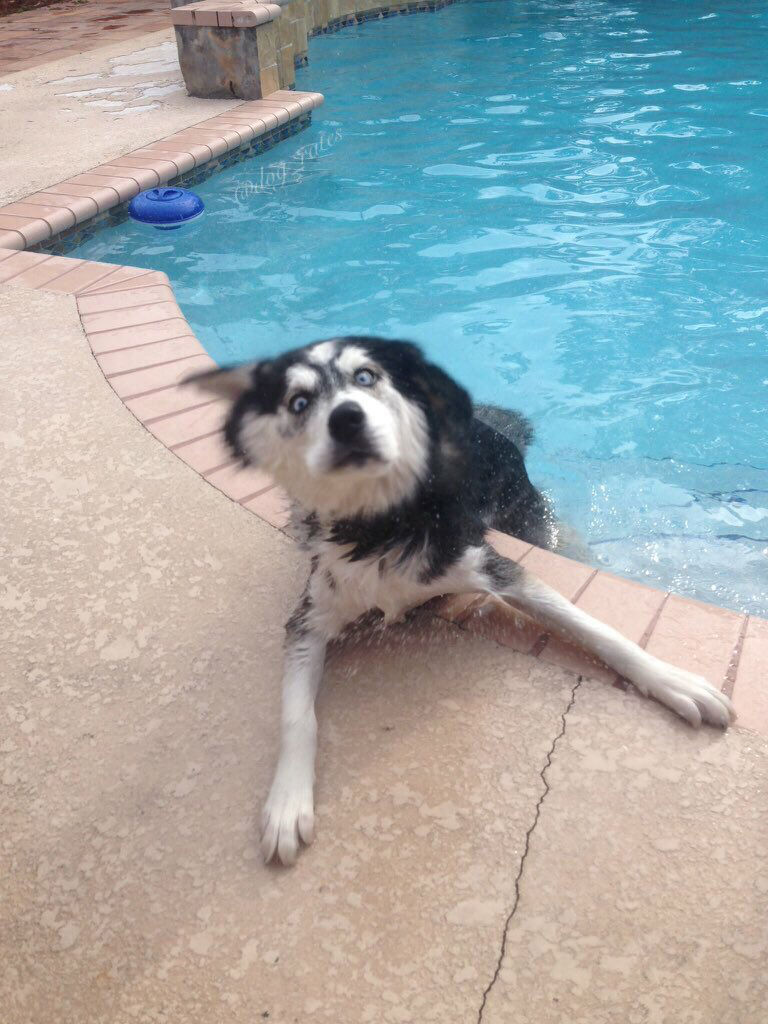

In [66]:
#duplicated photos shows wrong ones
url=image_prediction.jpg_url.iloc[578]
response = requests.get(url)
Image.open(BytesIO(response.content))


In [67]:
twitter_archive[twitter_archive.tweet_id==679062614270468097]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1748,679062614270468097,NaN,NaN,2015-12-21 22:15:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Chompsky. He lives up to his name. 11/10 https://t.co/Xl37lQEWd0,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/679062614270468097/photo/1,https://twitter.com/dog_rates/status/679062614270468097/photo/1",11,10,Chompsky,None,None,None,None


In [68]:
'''
 this will open the twitter page to verify 
 uncomment the below code please 
'''

# url="https://twitter.com/dog_rates/status/679062614270468097/photo/1"
# webbrowser.open(url)

'\n this will open the twitter page to verify \n uncomment the below code please \n'

In [69]:
twitter_archive[twitter_archive.tweet_id==757729163776290825]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
908,757729163776290825,NaN,NaN,2016-07-26 00:08:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Chompsky. He lives up to his name. 11/10 https://t.co/Xl37lQEWd0,6.790626e+17,4.196984e+09,2015-12-21 22:15:18 +0000,"https://twitter.com/dog_rates/status/679062614270468097/photo/1,https://twitter.com/dog_rates/status/679062614270468097/photo/1,https://twitter.com/dog_rates/status/679062614270468097/photo/1,http...",11,10,Chompsky,None,None,None,None


In [70]:
# url="https://twitter.com/dog_rates/status/757729163776290825/photo/1"
# webbrowser.open(url)

# Assesing jason_tweet data

In [71]:
json_tweet.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media...","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Rati...",NaN,NaN,None,NaN,False,8853,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/medi...","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.co...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Rati...",NaN,NaN,None,NaN,False,6514,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [72]:
print(json_tweet.lang.unique())
print(json_tweet.lang.nunique())

['en' 'und' 'in' 'eu' 'es' 'nl' 'tl' 'ro' 'et']
9


In [73]:
json_tweet.user[0]

{'id': 4196983835,
 'id_str': '4196983835',
 'name': 'WeRateDogs™ (author)',
 'screen_name': 'dog_rates',
 'location': 'DM YOUR DOGS, WE WILL RATE',
 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com',
 'url': 'https://t.co/N7sNNHAEXS',
 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS',
     'expanded_url': 'http://weratedogs.com',
     'display_url': 'weratedogs.com',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 3200889,
 'friends_count': 104,
 'listed_count': 2784,
 'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
 'favourites_count': 114031,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 5288,
 'lang': 'en',
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '000000',
 'prof

In [74]:
type(json_tweet.user[0])

dict

In [75]:
json_tweet.extended_entities[0]

{'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [76]:
image_prediction[image_prediction.img_num==2].head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
312,671547767500775424,https://pbs.twimg.com/media/CVHRIiqWEAAj98K.jpg,2,Loafer,0.255088,False,platypus,0.090019,False,cowboy_boot,0.066536,False


In [77]:
json_tweet[json_tweet.id==671547767500775424]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
2037,2015-12-01 04:33:59+00:00,671547767500775424,671547767500775424,This is Marley. She chews shoes then feels extremely guilty about it and refuses to look at them. 10/10 https://t.co/f99MV0htAV,False,"[0, 127]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 671547764132704256, 'id_str': '671547764132704256', 'indices': [104, 127], 'media_url': 'http://pbs.twimg.com/medi...","{'media': [{'id': 671547764132704256, 'id_str': '671547764132704256', 'indices': [104, 127], 'media_url': 'http://pbs.twimg.com/media/CVHRIirWcAAh2Nv.jpg', 'media_url_https': 'https://pbs.twimg.co...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Rati...",NaN,NaN,None,NaN,False,658,1444,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [78]:
twitter_archive[twitter_archive.tweet_id==671547767500775424]
# Inspecting the urls

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2039,671547767500775424,NaN,NaN,2015-12-01 04:33:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Marley. She chews shoes then feels extremely guilty about it and refuses to look at them. 10/10 https://t.co/f99MV0htAV,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/671547767500775424/photo/1,https://twitter.com/dog_rates/status/671547767500775424/photo/1",10,10,Marley,None,None,None,None


In [79]:
json_tweet.extended_entities.iloc[2039]

{'media': [{'id': 671542980751310848,
   'id_str': '671542980751310848',
   'indices': [117, 140],
   'media_url': 'http://pbs.twimg.com/media/CVHMyHMWwAALYXs.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/CVHMyHMWwAALYXs.jpg',
   'url': 'https://t.co/zzueJV9jCF',
   'display_url': 'pic.twitter.com/zzueJV9jCF',
   'expanded_url': 'https://twitter.com/dog_rates/status/671542985629241344/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 600, 'h': 800, 'resize': 'fit'},
    'large': {'w': 768, 'h': 1024, 'resize': 'fit'},
    'small': {'w': 340, 'h': 453, 'resize': 'fit'}}}]}

In [80]:
json_tweet.entities[0]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [81]:
print(json_tweet[json_tweet.id==892420643555336193]["full_text"])
print(twitter_archive[twitter_archive.tweet_id==892420643555336193]["text"])

0    This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
Name: full_text, dtype: object
0    This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
Name: text, dtype: object


In [82]:
# upon merging we'll drop full_text
print(json_tweet[json_tweet.id==891689557279858688]["full_text"])
print(twitter_archive[twitter_archive.tweet_id==891689557279858688]["text"])

3    This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
Name: full_text, dtype: object
3    This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
Name: text, dtype: object


In [83]:
# 
print(json_tweet[json_tweet.id==727155742655025152]["full_text"])
print(twitter_archive[twitter_archive.tweet_id==727155742655025152]["text"])

1144    When you're trying to enjoy yourself but end up having to take care of your way too drunk friend. 11/10 https://t.co/BRkhj6tdN0
Name: full_text, dtype: object
1146    When you're trying to enjoy yourself but end up having to take care of your way too drunk friend. 11/10 https://t.co/BRkhj6tdN0
Name: text, dtype: object


In [84]:
# two id columns 
json_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [85]:
# drop id_str column because it's inaccurate 
np.sum([i in twitter_archive.tweet_id.tolist() for i in json_tweet.id_str.astype(int)])

1518

In [86]:
# all false column this will be dropped 
(json_tweet.truncated).sum()

0

In [87]:
json_tweet.in_reply_to_screen_name.unique()

array([None, 'NonWhiteHat', 'roushfenway', 'RealKentMurphy',
       'ComplicitOwl', 'Jack_Septic_Eye', 'dog_rates', 'Marc_IRL',
       'xianmcguire', 'dhmontgomery', 's8n', 'markhoppus', '0_kelvin_0',
       'bragg6of8', 'jonnysun', 'docmisterio', 'UNC', 'HistoryInPics',
       'imgur', 'NBCSports', 'SkyWilliams', 'JODYHiGHROLLER', 'shibbnbot',
       'TheEllenShow', 'spaghemily', 'mount_alex3', 'serial', 'ABC',
       'CommonWhiteGirI', 'LightningHoltt', 'ABC7', 'wane15'],
      dtype=object)

In [88]:
json_tweet.in_reply_to_status_id_str.unique()

array([           nan, 8.86266357e+17, 8.81607037e+17, 8.79553827e+17,
       8.70726203e+17, 8.63425646e+17, 6.67152164e+17, 8.57156678e+17,
       8.55818117e+17, 8.56286004e+17, 8.55861584e+17, 8.55858536e+17,
       8.50328819e+17, 8.48212112e+17, 8.47606176e+17, 7.59099524e+17,
       8.40698300e+17, 8.38145499e+17, 8.38085539e+17, 8.35245984e+17,
       8.32087548e+17, 8.31903044e+17, 8.26598365e+17, 8.23326389e+17,
       8.21152593e+17, 8.13127252e+17, 8.11627233e+17, 7.33109485e+17,
       8.01854331e+17, 8.00857954e+17, 7.97123751e+17, 7.72743019e+17,
       7.66711819e+17, 7.63865175e+17, 7.50180499e+17, 7.47648654e+17,
       7.46885919e+17, 6.91416866e+17, 7.38411920e+17, 7.29113531e+17,
       7.07980066e+17, 7.03255936e+17, 7.04485745e+17, 7.03041950e+17,
       6.96488711e+17, 6.75349384e+17, 6.70668383e+17, 6.93642232e+17,
       6.93572216e+17, 6.92417313e+17, 6.92041935e+17, 6.90341254e+17,
       6.86034025e+17, 6.85547936e+17, 6.84959799e+17, 6.84481075e+17,
      

# Cleaning twitter_archive:

In [89]:
# copy data for cleaning
tw_clean=twitter_archive.copy()
img_clean=image_prediction.copy()
json_clean=json_tweet.copy()

In [90]:
tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [91]:
#Define: column (1,2,6,7,8) have missing data we will drop them
cols=[1,2,6,7,8]
tw_clean.drop(list(tw_clean.columns[cols]),axis=1,inplace=True)#code
#test
tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


In [92]:
# Define:convert correct object dtype
tw_clean.timestamp=pd.to_datetime(tw_clean.timestamp)#code
#test
print(tw_clean.timestamp[0],"\n",type(tw_clean.timestamp[0]))

2017-08-01 16:23:56+00:00 
 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [93]:
# how many RT we have
print("retweet length:",retweet.shape[0])
print("original dataframe length:",tw_clean.shape[0])


retweet length: 183
original dataframe length: 2356


In [94]:
2356-183

2173

In [95]:
# Define: remove text where there are Retweets
tw_clean.drop(list(retweet.index),axis=0,inplace=True) #code

#test
print(tw_clean.shape[0])
print(np.sum([i for i in tw_clean.index if i in retweet.index]))

2173
0.0


In [96]:
# text where there are mentions
mention=tw_clean.text.str.startswith("@")
mention=tw_clean[mention]
mention.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,2017-07-15 16:51:35+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,12,10,None,None,None,None,None
55,881633300179243008,2017-07-02 21:58:53+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,17,10,None,None,None,None,None
64,879674319642796034,2017-06-27 12:14:36+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,14,10,None,None,None,None,None
113,870726314365509632,2017-06-02 19:38:25+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,10,10,None,None,None,None,None
148,863427515083354112,2017-05-13 16:15:35+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,12,10,None,None,None,None,None


In [97]:
# Define: remove text where there are mentions
tw_clean.drop(list(mention.index),axis=0,inplace=True) #code

#test
print(tw_clean.shape[0])
print(np.sum([i for i in tw_clean.index if i in mention.index]))

2150
0.0


In [98]:
# is there multiple dog stages in one row row
tw_clean.loc[(tw_clean[['doggo', 'floofer', 'pupper', 'puppo']]!= 'None').sum(axis=1)>1]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,2017-04-22 18:31:02+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo
200,854010172552949760,2017-04-17 16:34:26+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk","https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggo,floofer,None,None
460,817777686764523521,2017-01-07 16:59:28+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,2016-12-12 00:29:28+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None
565,802265048156610565,2016-11-25 21:37:47+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None
575,801115127852503040,2016-11-22 17:28:25+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None
705,785639753186217984,2016-10-11 00:34:48+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,2016-09-29 01:42:20+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
889,759793422261743616,2016-07-31 16:50:42+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll","https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,2016-07-09 01:08:47+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,https://twitter.com/dog_rates/status/75158

In [99]:
# Define: most of these are two dogs pictures or even a video. I will drop them
#code
indx=tw_clean.loc[(tw_clean[['doggo', 'floofer', 'pupper', 'puppo']]!= 'None').sum(axis=1)>1].index
tw_clean.drop(labels=indx,axis=0,inplace=True)
#Test
tw_clean.loc[(tw_clean[['doggo', 'floofer', 'pupper', 'puppo']]!= 'None').sum(axis=1)>1]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [100]:
for i,v in enumerate(tw_clean.columns[-4:]):
    print(tw_clean[v].value_counts())

None     2065
doggo      73
Name: doggo, dtype: int64
None       2129
floofer       9
Name: floofer, dtype: int64
None      1914
pupper     224
Name: pupper, dtype: int64
None     2114
puppo      24
Name: puppo, dtype: int64


In [101]:
tw_clean.loc[(tw_clean[['doggo', 'floofer', 'pupper', 'puppo']]== 'None').sum(axis=1)==4].shape

(1808, 12)

In [102]:
# value_vars=['doggo', 'floofer', 'pupper', 'puppo']
#id_vars=[i for i in list(tw_clean.columns) if i not in value_vars]

# pd.melt(tw_clean,id_vars=id_vars,value_vars=value_vars)

In [103]:
# Define :inconsistent columns (doggo, floofer, pupper, puppo)
# code
value_vars=['doggo', 'floofer', 'pupper', 'puppo']
id_vars=[i for i in list(tw_clean.columns) if i not in value_vars]
tw_test=tw_clean.replace(to_replace="None",value=np.nan,inplace=False)

tw_test=tw_test.melt(id_vars=id_vars,value_vars=value_vars,value_name="dog_stage")
tw_test=tw_test.drop("variable",axis=1,inplace=False)
tw_test=tw_test.drop_duplicates(subset="tweet_id",inplace=False,keep="last")
# test
tw_test=tw_test.reset_index(drop=True)
print("shape:",tw_test.shape)
tw_test.head()

shape: (2138, 9)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN


In [104]:
# Define: extracting inconsistent 
#columns name (doggo, floofer, pupper, puppo) into one column

#code
regx=re.compile(r"(doggo|floofer|pupper|puppo)")
tw_clean["stage"]=tw_clean.text.str.extract(regx)
#test
tw_clean.stage.value_counts() 

pupper     242
doggo       74
puppo       30
floofer      4
Name: stage, dtype: int64

In [105]:
#Define: drop doggo,floofer,pupper,puppo columns
#code
labels=['doggo','floofer','pupper','puppo']
tw_clean.drop(labels=labels,axis=1,inplace=True)
#test
tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2138 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2138 non-null   int64              
 1   timestamp           2138 non-null   datetime64[ns, UTC]
 2   source              2138 non-null   object             
 3   text                2138 non-null   object             
 4   expanded_urls       2103 non-null   object             
 5   rating_numerator    2138 non-null   int64              
 6   rating_denominator  2138 non-null   int64              
 7   name                2138 non-null   object             
 8   stage               350 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 167.0+ KB


In [106]:
tw_clean.reset_index(drop=True,inplace=True)

In [107]:
tw_clean.iloc[1600:1650]["tweet_id"]

1600    676613908052996102
1601    676606785097199616
1602    676603393314578432
1603    676593408224403456
1604    676590572941893632
1605    676588346097852417
1606    676582956622721024
1607    676575501977128964
1608    676533798876651520
1609    676496375194980353
1610    676470639084101634
1611    676440007570247681
1612    676430933382295552
1613    676263575653122048
1614    676237365392908289
1615    676219687039057920
1616    676215927814406144
1617    676191832485810177
1618    676146341966438401
1619    676121918416756736
1620    676101918813499392
1621    676098748976615425
1622    676089483918516224
1623    675898130735476737
1624    675891555769696257
1625    675888385639251968
1626    675878199931371520
1627    675870721063669760
1628    675853064436391936
1629    675849018447167488
1630    675845657354215424
1631    675822767435051008
1632    675820929667219457
1633    675798442703122432
1634    675781562965868544
1635    675740360753160193
1636    675710890956750848
1

In [108]:
tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2138 entries, 0 to 2137
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2138 non-null   int64              
 1   timestamp           2138 non-null   datetime64[ns, UTC]
 2   source              2138 non-null   object             
 3   text                2138 non-null   object             
 4   expanded_urls       2103 non-null   object             
 5   rating_numerator    2138 non-null   int64              
 6   rating_denominator  2138 non-null   int64              
 7   name                2138 non-null   object             
 8   stage               350 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 150.5+ KB


In [109]:
# checking for the names column
tw_clean.name.value_counts().head(10)

None       648
a           55
Charlie     11
Lucy        11
Cooper      10
Oliver      10
Penny        9
Tucker       9
Winston      8
Lola         8
Name: name, dtype: int64

In [110]:
#checking for 'None' names
tw_clean.query("name=='None'")[["text","name","expanded_urls"]].sample(10)

,text,name,expanded_urls
1589,This pups goal was to get all four feet as close to each other as possible. Valiant effort 12/10 https://t.co/2mXALbgBTV,None,https://twitter.com/dog_rates/status/676946864479084545/photo/1
1253,"""Martha come take a look at this. I'm so fed up with the media's unrealistic portrayal of dogs these days."" 10/10 https://t.co/Sd4qAdSRqI",None,https://twitter.com/dog_rates/status/694206574471057408/photo/1
1225,Guys I found the dog from Up. 12/10 https://t.co/WqoZtX9jmJ,None,https://twitter.com/dog_rates/status/696886256886657024/photo/1
1258,What kind of person sends in a pic without a dog in it? So churlish. Neat rug tho 7/10 https://t.co/LSTAwTdTaw,None,https://twitter.com/dog_rates/status/693647888581312512/photo/1
2103,"""Can you behave? You're ruining my wedding day""\nDOG: idgaf this flashlight tastes good as hell\n\n10/10 https://t.co/GlFZPzqcEU",None,https://twitter.com/dog_rates/status/666435652385423360/photo/1
1145,Happy Friday here's a sleepy pupper 12/10 https://t.co/eBcqv9SPkY,None,https://twitter.com/dog_rates/status/703268521220972544/photo/1
1889,Honor to rate this dog. Great teeth. Nice horns. Unbelievable posture. Fun to pet. Big enough to ride. 10/10 rad dog https://t.co/7JMAHdJ6A4,None,https://twitter.com/dog_rates/status/670474236058800128/photo/1
1559,After getting lost in Reese's eyes for several minutes we're going to upgrade him to a 13/10,None,NaN
188,.@breaannanicolee PUPDATE: Cannon has a heart on his nose. Pupgraded to a 13/10,None,NaN
1396,"""Tristan do not speak to me with that kind of tone or I will take away the Xbox."" 10/10 https://t.co/VGPH0TfESw",None,https://twitter.com/dog_rates/status/685325112850124800/photo/1


In [111]:
#checking for 'a' names
tw_clean.query("name=='a'")[["tweet_id","text","name"]].sample(10)

,tweet_id,text,name
1125,704859558691414016,Here is a heartbreaking scene of an incredible pupper being laid to rest. 10/10 RIP pupper https://t.co/81mvJ0rGRu,a
2019,668171859951755264,This is a Trans Siberian Kellogg named Alfonso. Huge ass eyeballs. Actually Dobby from Harry Potter. 7/10 https://t.co/XpseHBlAAb,a
1661,675109292475830276,C'mon guys. We've been over this. We only rate dogs. This is a cow. Please only submit dogs. Thank you...... 9/10 https://t.co/WjcELNEqN2,a
2129,666057090499244032,My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,a
796,747885874273214464,This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,a
2132,666050758794694657,This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,a
840,743222593470234624,This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,a
498,792913359805018113,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,a
2055,667470559035432960,This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,a
1995,668614819948453888,Here is a horned dog. Much grace. Can jump over moons (dam!). Paws not soft. Bad at barking. 7/10 can still pet tho https://t.co/2Su7gmsnZm,a


In [112]:
tw_clean=tw_clean[tw_clean["name"].notna()].copy()
odd_names=tw_clean.name.str.contains("^[a-z]")#names start with lowercase letters 

In [113]:
tw_clean[odd_names].name.value_counts()

a               55
the              8
an               6
one              4
very             4
quite            3
just             2
actually         2
not              2
getting          2
his              1
mad              1
by               1
officially       1
all              1
light            1
such             1
infuriating      1
incredibly       1
space            1
unacceptable     1
life             1
old              1
my               1
this             1
Name: name, dtype: int64

In [114]:
tw_clean.shape

(2138, 9)

In [115]:
# non of those are valid names so it will be droped
#define : drop Invalid names
#code
indx=list(tw_clean[odd_names].name.index)
tw_clean.drop(indx,axis=0,inplace=True)

In [116]:
#test
assert tw_clean[odd_names].name.value_counts().tolist()==[]

/Users/abdullahabu-sabba/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [117]:
tw_clean.name.replace(to_replace="None",value=np.nan,inplace=True)
tw_clean.name.value_counts()

Charlie    11
Lucy       11
Cooper     10
Oliver     10
Penny       9
           ..
Fiji        1
Lupe        1
Livvie      1
Tyrone      1
Aja         1
Name: name, Length: 927, dtype: int64

In [118]:
# Define :change source columns to proper names
tw_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1913
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          85
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       27
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [119]:
#code
tw_clean.source.replace(tw_clean.source.value_counts().index[0],"Twitter for iPhone",inplace=True)
tw_clean.source.replace(tw_clean.source.value_counts().index[1],"Vine - Make a Scene",inplace=True)
tw_clean.source.replace(tw_clean.source.value_counts().index[2],"Web Client",inplace=True)
tw_clean.source.replace(tw_clean.source.value_counts().index[3],"TweetDeck",inplace=True)
#Test
tw_clean.source.value_counts()

Twitter for iPhone     1913
Vine - Make a Scene      85
Web Client               27
TweetDeck                10
Name: source, dtype: int64

In [120]:
# rating_numerator
tw_clean.rating_numerator.value_counts().sort_index()

0         2
1         7
2         7
3        18
4        14
5        34
6        30
7        48
8        91
9       142
10      415
11      405
12      473
13      294
14       37
20        1
24        1
26        1
27        1
44        1
45        1
50        1
75        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
420       1
1776      1
Name: rating_numerator, dtype: int64

In [121]:
tw_clean[tw_clean.rating_numerator==1776][["rating_numerator","rating_denominator","text"]]

,rating_numerator,rating_denominator,text
773,1776,10,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh


In [122]:
tw_clean.iloc[761]["expanded_urls"] 
# well it appeares that it's valid, just wanted to check that 

'https://twitter.com/dog_rates/status/749981277374128128/photo/1'

In [123]:
tw_clean[tw_clean.rating_numerator==1][["rating_numerator","rating_denominator","text"]]

,rating_numerator,rating_denominator,text
1231,1,10,After reading the comments I may have overestimated this pup. Downgraded to a 1/10. Please forgive me
1653,1,10,What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0
1724,1,10,The millennials have spoken and we've decided to immediately demote to a 1/10. Thank you
1822,1,10,After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes
1875,1,10,Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO
2043,1,10,Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx
2120,1,10,Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX


In [124]:
tw_clean[tw_clean.rating_numerator==420][["rating_numerator","rating_denominator","text"]]

,rating_numerator,rating_denominator,text
1858,420,10,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY


In [125]:
# as we saw in assissing part some ratings contains fraction points
tw_clean.reset_index(drop=True,inplace=True)
tw_clean[tw_clean["text"].str.contains(r"(\d+\.\d*\/\d+)")][["tweet_id","rating_numerator","rating_denominator","text"]]

/Users/abdullahabu-sabba/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,rating_numerator,rating_denominator,text
40,883482846933004288,5,10,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948"
524,786709082849828864,75,10,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"
581,778027034220126208,27,10,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
1430,681340665377193984,5,10,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace
1452,680494726643068929,26,10,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD


In [126]:
# Define: changing column dtype to float and some incorrect values to the correct ones
#code
tw_clean.rating_numerator=tw_clean.rating_numerator.astype(float)
tw_clean.iloc[40,5]=13.5
tw_clean.iloc[524,5]=9.75
tw_clean.iloc[581,5]=11.27
tw_clean.iloc[1430,5]=9.5
tw_clean.iloc[1452,5]=11.26
tw_clean.reset_index(drop=True,inplace=True)
#test
tw_clean[tw_clean["text"].str.contains(r"(\d+\.\d*\/\d+)")]\
[["tweet_id","rating_numerator","rating_denominator","text"]]

/Users/abdullahabu-sabba/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,rating_numerator,rating_denominator,text
40,883482846933004288,13.50,10,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948"
524,786709082849828864,9.75,10,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"
581,778027034220126208,11.27,10,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
1430,681340665377193984,9.50,10,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace
1452,680494726643068929,11.26,10,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD


In [127]:
tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2035 non-null   int64              
 1   timestamp           2035 non-null   datetime64[ns, UTC]
 2   source              2035 non-null   object             
 3   text                2035 non-null   object             
 4   expanded_urls       2000 non-null   object             
 5   rating_numerator    2035 non-null   float64            
 6   rating_denominator  2035 non-null   int64              
 7   name                1387 non-null   object             
 8   stage               335 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(5)
memory usage: 143.2+ KB


In [128]:
tw_clean.rating_denominator.value_counts()

10     2018
80        2
50        2
20        2
11        2
150       1
130       1
120       1
110       1
90        1
70        1
40        1
16        1
7         1
Name: rating_denominator, dtype: int64

In [129]:
iter_=tw_clean.rating_denominator.value_counts().index.tolist()
iter_.remove(10)
iter_

[80, 50, 20, 11, 150, 130, 120, 110, 90, 70, 40, 16, 7]

In [130]:
for value in iter_:
    print("value=",value,":")
    print(tw_clean.loc[tw_clean["rating_denominator"]==value]["text"])
    print("-"*100)

value= 80 :
1010    Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
1577     Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw
Name: text, dtype: object
----------------------------------------------------------------------------------------------------
value= 50 :
961                                  This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1029    From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK
Name: text, dtype: object
----------------------------------------------------------------------------------------------------
value= 20 :
925                                                                             Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1340    Yes I do real

In [131]:
# index 402 is not a valid rating '24/7'
tw_clean.iloc[402]["text"]

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

In [132]:
# index 1403 is not a valid rating for both numerator & denominator
tw_clean.iloc[1403][["rating_numerator","rating_denominator","text"]]

rating_numerator                                                                                                                                                7
rating_denominator                                                                                                                                             11
text                  This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
Name: 1403, dtype: object

In [133]:
#Define : correct values manually
#code
tw_clean.iloc[1403,5]=10
tw_clean.iloc[1403,6]=10
tw_clean.iloc[836,5]=14
tw_clean.iloc[836,6]=10
tw_clean.iloc[925,5]=13
tw_clean.iloc[925,6]=10
tw_clean.iloc[961,5]=11
tw_clean.iloc[961,6]=10
# tw_clean.drop(index=402,axis=0,inplace=True)
# tw_clean.reset_index(drop=True,inplace=True)

In [134]:
#test
print(tw_clean.iloc[1403,5],tw_clean.iloc[1403,6])
print(tw_clean.iloc[836,5],tw_clean.iloc[836,6])
print(tw_clean.iloc[925,5],tw_clean.iloc[925,6])
print(tw_clean.iloc[961,5],tw_clean.iloc[961,6])

10.0 10
14.0 10
13.0 10
11.0 10


In [135]:
tw_clean.iloc[402]

tweet_id                                                                                                                                                                     810984652412424192
timestamp                                                                                                                                                             2016-12-19 23:06:23+00:00
source                                                                                                                                                                       Twitter for iPhone
text                  Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
expanded_urls                                                                               https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1
rating_numerator                        

In [136]:
#Define: replace incorrect value with NaN
#code
tw_clean.iloc[402,5]=np.nan
tw_clean.iloc[402,6]=np.nan

In [137]:
#test
tw_clean.iloc[402]

tweet_id                                                                                                                                                                     810984652412424192
timestamp                                                                                                                                                             2016-12-19 23:06:23+00:00
source                                                                                                                                                                       Twitter for iPhone
text                  Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
expanded_urls                                                                               https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1
rating_numerator                        

In [138]:
tw_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,NaN


In [139]:
tw_clean.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/690021994562220032/photo/1    1
https://twitter.com/dog_rates/status/756526248105566208/photo/1    1
https://twitter.com/dog_rates/status/680130881361686529/photo/1    1
https://twitter.com/dog_rates/status/817056546584727552/photo/1    1
https://twitter.com/dog_rates/status/737322739594330112/photo/1    1
                                                                  ..
https://twitter.com/dog_rates/status/841680585030541313/photo/1    1
https://twitter.com/dog_rates/status/673583129559498752/photo/1    1
https://twitter.com/dog_rates/status/785927819176054784/photo/1    1
https://twitter.com/dog_rates/status/693262851218264065/photo/1    1
https://twitter.com/dog_rates/status/737445876994609152/photo/1    1
Name: expanded_urls, Length: 2000, dtype: int64

In [140]:
tw_clean.expanded_urls.str.split(",")[190]

['https://twitter.com/dog_rates/status/846514051647705089/photo/1',
 'https://twitter.com/dog_rates/status/846514051647705089/photo/1',
 'https://twitter.com/dog_rates/status/846514051647705089/photo/1']

In [141]:
tw_clean.expanded_urls.isna().sum()

35

In [142]:
tw_clean["url"]=tw_clean.expanded_urls.str.split(",").str[-1]

In [143]:
tw_clean["url"][190]

'https://twitter.com/dog_rates/status/846514051647705089/photo/1'

In [144]:
tw_clean.url.isna().sum()

35

In [145]:
# (tw_clean[["expanded_urls","url"]].style
#  .set_properties(subset=['url'],
#                  **{'width-min': '300px'
#                     ,'background-color': 'lightyellow'})
# )

In [146]:
# Define: drop expanded url
#code
tw_clean.drop(labels="expanded_urls",axis=1,inplace=True)
#test
tw_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'stage', 'url'],
      dtype='object')

# Cleaning json_file tweet:

In [147]:
json_clean.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media...","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Rati...",NaN,NaN,None,NaN,False,8853,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/medi...","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.co...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Rati...",NaN,NaN,None,NaN,False,6514,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/medi...","{'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'media_url_https': 'https://pbs.twimg.co...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Rati...",NaN,NaN,None,NaN,False,4328,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'media_url': 'http://pbs.twimg.com/media...","{'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'media_url': 'http://pbs.twimg.com/media/DF_

In [148]:
json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [149]:
# drop columns that won't be necessary to this analysis 
drop_json=["quoted_status","quoted_status_id_str",\
           "quoted_status_id","retweeted_status",\
          "contributors","place","coordinates","geo",\
          "in_reply_to_screen_name","in_reply_to_user_id_str",\
          "in_reply_to_user_id","in_reply_to_status_id_str",\
           "in_reply_to_status_id","possibly_sensitive_appealable",\
           "possibly_sensitive","truncated","user"]
json_clean.drop(labels=drop_json,axis=1,inplace=True)

In [150]:
json_clean.head(2)

,created_at,id,id_str,full_text,display_text_range,entities,extended_entities,source,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media...","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,8853,39467,False,False,en
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV","[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/medi...","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.co...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,6514,33819,False,False,en


In [151]:
json_clean.is_quote_status.sum()

31

In [152]:
json_clean.describe()

,id,id_str,retweet_count,favorite_count
count,2.354000e+03,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,8.924206e+17,79515.000000,132810.000000


# Cleaning Image prediction:

In [153]:
img_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [154]:
img_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [155]:
'''
 Define: rearrange the data frame to be tidy 
 and dropping unnecessary columns  
 for the merge process ahead '''

#code
# predction=img_clean[['p1_dog', 'p1_dog', 'p3_dog']]
# algorithm=img_clean[['p1', 'p2', 'p3']]
# conf=img_clean[['p1_conf', 'p2_conf', 'p3_conf']]
# m1=pd.melt(predction,value_name="prdiction")
# m2=pd.melt(algorithm)
# m2["algorithm"]=m2["value"]+"_"+m2.variable
# m3=pd.melt(conf,value_name="confidence")
# m1.drop(labels="variable",inplace=True,axis=1)
# m2.drop(labels=["value","variable"],inplace=True,axis=1)
# m3.drop(labels="variable",inplace=True,axis=1)
# algorithm=m2.join([m3,m1])

'\n Define: rearrange the data frame to be tidy \n and dropping unnecessary columns  \n for the merge process ahead '

In [156]:
# Define:we'll merge json_clean,tw_clean and img_clean then we'll continues on the new dataframe
#code
json_clean.rename(columns={"id":"tweet_id","source":"sourc"},inplace=True)
twitter_archive_enhanced=pd.merge(tw_clean,json_clean,on="tweet_id")
keep_col=tw_clean.columns.tolist()
keep_col.append("retweet_count");keep_col.append("favorite_count")
twitter_archive_enhanced\
.drop(labels=[x for x in twitter_archive_enhanced.columns.tolist()\
if x not in keep_col],axis=1,inplace=True)
#test
check_id=json_clean.iloc[1856]["tweet_id"]
print("check this id on both dataframes:",check_id)
print(json_clean[json_clean["tweet_id"]==check_id][["retweet_count","favorite_count"]])
print(twitter_archive_enhanced[twitter_archive_enhanced["tweet_id"]==check_id][["retweet_count","favorite_count"]])

check this id on both dataframes: 675501075957489664
      retweet_count  favorite_count
1856           6485           18482
      retweet_count  favorite_count
1590           6485           18482


In [157]:
# Define:merging with img_prediction for first algorithms as it's 95% confident
#code
twitter_archive_enhanced=pd.merge(twitter_archive_enhanced,img_clean[["tweet_id","p1","p1_conf","p1_dog"]],
        on="tweet_id")

In [158]:
twitter_archive_enhanced.loc[1860,"tweet_id"]

666644823164719104

In [159]:
#test
indx_img=img_clean[img_clean["tweet_id"]==666644823164719104].index[0]
indx_tw=twitter_archive_enhanced[twitter_archive_enhanced["tweet_id"]==666644823164719104].index[0]
print(img_clean.loc[indx_img,"p1"],img_clean.loc[indx_img,"p1_conf"],img_clean.loc[indx_img,"tweet_id"])
print(twitter_archive_enhanced.loc[indx_tw,"p1"],twitter_archive_enhanced.loc[indx_tw,"p1_conf"],twitter_archive_enhanced.loc[indx_tw,"tweet_id"])

Ibizan_hound 0.0443334 666644823164719104
Ibizan_hound 0.0443334 666644823164719104


In [160]:
twitter_archive_enhanced.rename(columns={"p1":"algorithm",
                                        "p1_conf":"confidence",
                                        "p1_dog":"is_dog"},inplace=True)
twitter_archive_enhanced.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,url,retweet_count,favorite_count,algorithm,confidence,is_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0,Phineas,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,8853,39467,orange,0.097049,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0,Tilly,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,6514,33819,Chihuahua,0.323581,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10.0,Archie,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,4328,25461,Chihuahua,0.716012,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10.0,Darla,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,8964,42908,paper_towel,0.170278,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10.0,Franklin,NaN,https://twitter.com/dog_rates/status/891327558926688256/photo/1,9774,41048,basset,0.555712,True


In [161]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1885 entries, 0 to 1884
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1885 non-null   int64              
 1   timestamp           1885 non-null   datetime64[ns, UTC]
 2   source              1885 non-null   object             
 3   text                1885 non-null   object             
 4   rating_numerator    1884 non-null   float64            
 5   rating_denominator  1884 non-null   float64            
 6   name                1346 non-null   object             
 7   stage               302 non-null    object             
 8   url                 1885 non-null   object             
 9   retweet_count       1885 non-null   int64              
 10  favorite_count      1885 non-null   int64              
 11  algorithm           1885 non-null   object             
 12  confidence          1885 non-null 

In [162]:
twitter_archive_enhanced.describe()
twitter_archive_enhanced.to_csv("twitter_archive_master.csv",index=False)

# Note:
not all Quality, Tidiness issues will be mentioned  

# Quality issues:
1. column (1,2,6,7,8) have missing data → twitter archive 
2. timestamp is set to str Instead of datetime object→ twitter archive 
3. most text start with 'this is {name}' Corresponding to name column but some names are incorrect (i.e. this,a,all,old)→twitter archive
4. source columns data is valid, but there are multiple correct ways of referring to the same thing we can split it and use the source of the Tweet (i.e for iPhone, Twitter Web Client)→ twitter archive
5. Numerator has incorrect values→ twitter archive
6. Denominator has incoreect values→ twitter archive
7. upon merging the data we need to drop some rows/column for the merge to complete
8. remove entries that are retweets→ twitter archive 
9. replace None with NaN twitter archive  
10. drop duplicates in jpg URL → image prediction   
11. Missing data in more than 10 columns → json tweet

# Tidiness issues:
1. inconsistent columns (doggo, floofer , pupper , puppo) can be in one single columns 'stage' → twitter archive 
2. multiple variables are stored in one column 'expanded URLs '→ twitter archive
3. multiple variables are stored in one column 'display text range '→ json tweet
4. <algorithm columns should be melt () to three columns (prediction , algorithm , confidence )→ image prediction
5. combine data frames


# Visualization:

Text(0.5, 1, 'calculating the Pearson coefficient of correlation')

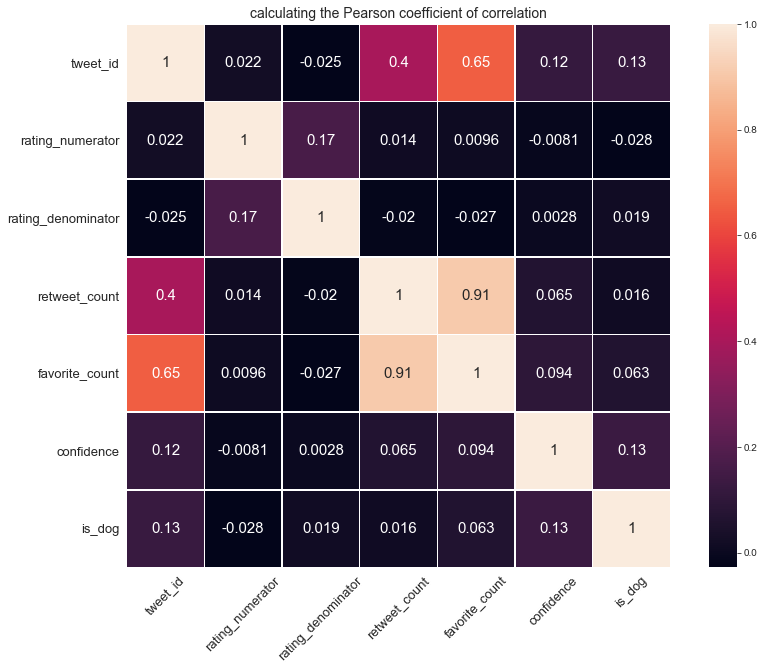

In [163]:
sns.set_style("darkgrid")
plt.figure(figsize=(14,10))
coff=twitter_archive_enhanced.corr("pearson")
_=sns.heatmap(coff,xticklabels=coff.columns,
             yticklabels=coff.columns,annot=True,
             annot_kws={"size":15},linewidth=.5,square=True)
plt.xticks(rotation=45,size=13)
plt.yticks(size=13)
plt.title("calculating the Pearson coefficient of correlation",size=14)
#plt.savefig("heatmap.png")

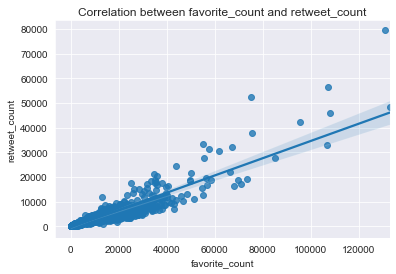

In [164]:
_=sns.regplot(x="favorite_count",y="retweet_count",data=twitter_archive_enhanced)
_=plt.title("Correlation between favorite_count and retweet_count")
#plt.savefig("regplot.png")

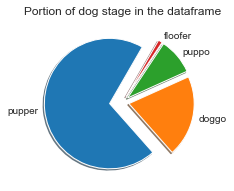

In [165]:
figure, axis = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
stages=twitter_archive_enhanced.stage.value_counts()
explode = (0.2, 0.1, 0.1, 0.1)

_=axis.pie(stages,explode=explode,labels=stages.index.tolist(),
          shadow=True,startangle=60)
_=plt.title("Portion of dog stage in the dataframe")
#plt.savefig("pie.png")

In [166]:
twitter_archive_enhanced.algorithm.value_counts().head(10)

golden_retriever      132
Labrador_retriever     91
Pembroke               84
Chihuahua              77
pug                    51
Samoyed                38
chow                   38
Pomeranian             36
toy_poodle             34
malamute               28
Name: algorithm, dtype: int64

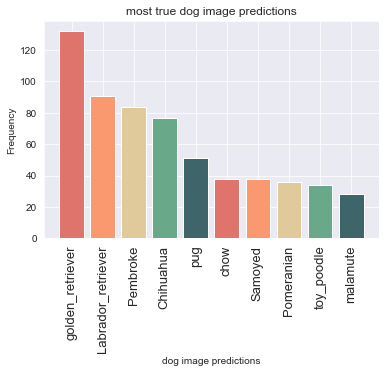

In [167]:
p1=twitter_archive_enhanced.query("is_dog==True").algorithm.value_counts().head(10)
color=["#de746c","#fa986f","#e0c99b","#6aa88a","#3e656a"]
_=plt.bar(height=p1.values,x=p1.index,color=color)
_=plt.xticks(rotation=90,size=13)
_=plt.ylabel("Frequency")
_=plt.xlabel("dog image predictions")
_=plt.title("most true dog image predictions")
#plt.savefig("Insight_3.png")

# Insights:

1. from the heat map and regplot we noticed a strange correlation between favorite and retweet, we visualize these variables using since regplot so whenever there are high retweets is highly likely to have as much favored

2. Dogs in Pupper stage get most tweets.
3. Most true image predictionare (golden_retriever','Labrador_retriever','Pembroke') 